In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().values.any()

False

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df[(df['Glucose']==0) | (df['Insulin']==0) | (df['BloodPressure']==0) | (df['SkinThickness']==0) | (df['BMI']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df_cl=df[(df['Glucose']!=0) & (df['Insulin']!=0) & (df['BloodPressure']!=0) & (df['SkinThickness']!=0) & (df['BMI']!=0)]

In [7]:
df_cl.shape

(392, 9)

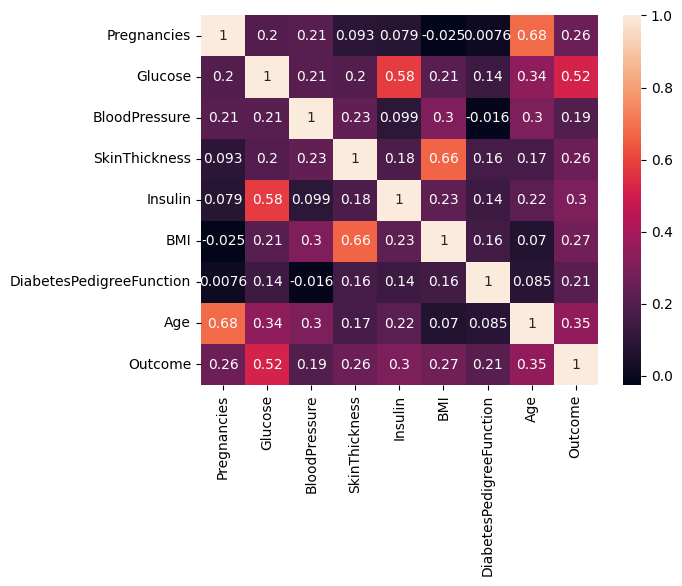

In [8]:
import seaborn as sns
sns.heatmap(df_cl.corr(),annot=True);

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [10]:
x=df_cl.drop('Outcome',axis=1)
x_const=add_constant(x)

In [11]:
vif=pd.DataFrame()
vif['Variable']=x_const.columns
vif['VIF']=[variance_inflation_factor(x_const.values,i)

for i in range(x_const.shape[1])]
print(vif)

                   Variable        VIF
0                     const  54.437963
1               Pregnancies   1.900719
2                   Glucose   1.670072
3             BloodPressure   1.231815
4             SkinThickness   1.852772
5                   Insulin   1.556143
6                       BMI   1.979596
7  DiabetesPedigreeFunction   1.059315
8                       Age   2.129433


In [12]:
cols_with_zero=['Glucose','Insulin','BloodPressure','SkinThickness','BMI']

In [13]:
df[cols_with_zero]=df[cols_with_zero].replace(0,np.nan)

In [15]:
df_mean_filled=df.copy()
df_mean_filled[cols_with_zero]=df_mean_filled[cols_with_zero].fillna(df_mean_filled[cols_with_zero].mean())

In [16]:
df_median_filled=df.copy()
df_median_filled[cols_with_zero]=df_median_filled[cols_with_zero].fillna(df_median_filled[cols_with_zero].median())

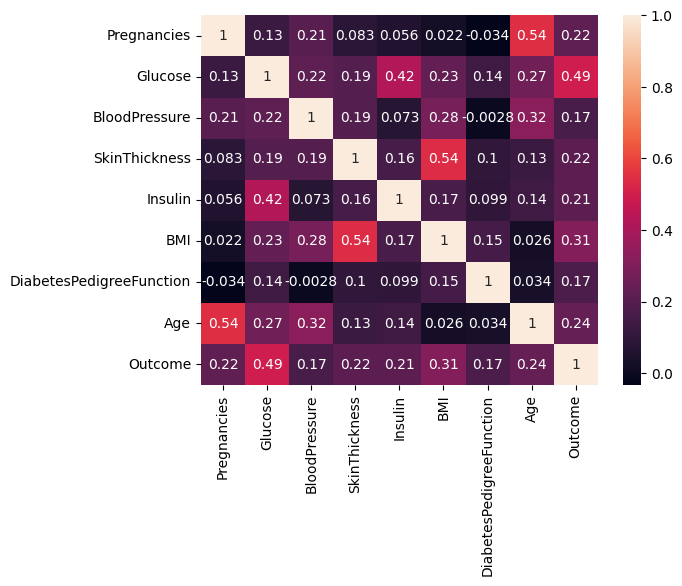

In [17]:
sns.heatmap(df_mean_filled.corr(),annot=True);

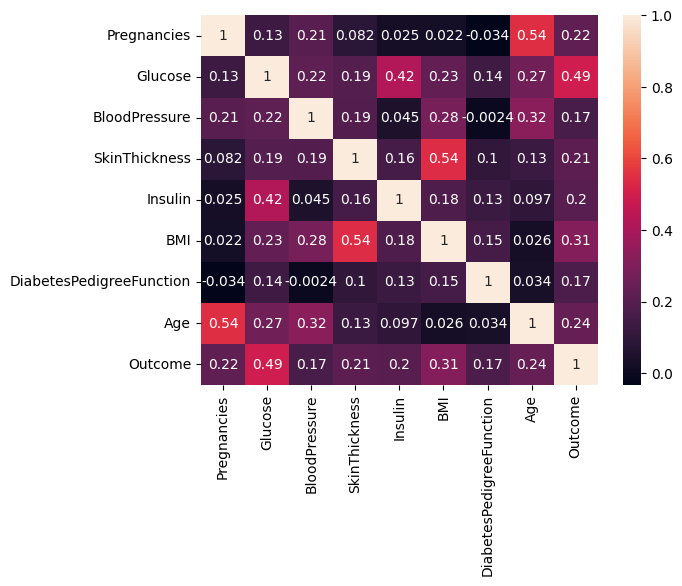

In [18]:
sns.heatmap(df_median_filled.corr(),annot=True);

In [19]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [20]:
x_cl=df_cl.drop('Outcome',axis=1)
y_cl=df_cl['Outcome']

In [21]:
x_train_cl,x_test_cl,y_train_cl,y_test_cl=train_test_split(x_cl,y_cl,test_size=0.2,random_state=42)

In [22]:
import statsmodels.api as sm

In [23]:
model=sm.Logit(y_train_cl,x_train_cl)
model_log=model.fit()

Optimization terminated successfully.
         Current function value: 0.557027
         Iterations 6


In [24]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  313
Model:                          Logit   Df Residuals:                      305
Method:                           MLE   Df Model:                            7
Date:                Thu, 28 Aug 2025   Pseudo R-squ.:                  0.1207
Time:                        14:31:43   Log-Likelihood:                -174.35
converged:                       True   LL-Null:                       -198.29
Covariance Type:            nonrobust   LLR p-value:                 3.750e-08
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1468      0.056      2.633      0.008       0.038       0.256
Glucose                      0.0161      0.005      3.173      0.002       0.006       0.026
BloodPressure               -0.0412      0.011     -3.871      0.000      -0.062      -0.020
SkinThickness                0.0340      0.017      2.045      0.041       0.001       0.067
Insulin                      0.0031      0.001      2.326      0.020       0.000       0.006
BMI                         -0.0516      0.026     -1.991      0.046      -0.102      -0.001
DiabetesPedigreeFunction     0.3893      0.380      1.026      0.305      -0.355       1.133
Age                         -0.0069      0.017     -0.394      0.693      -0.041       0.027
============================================================================================
"""

In [25]:
x_train_cl_r=x_train_cl.drop(['DiabetesPedigreeFunction','Age'],axis=1)
x_test_cl_r=x_test_cl.drop(['DiabetesPedigreeFunction','Age'],axis=1)

In [26]:
x_mean=df_mean_filled.drop('Outcome',axis=1)
y_mean=df_mean_filled['Outcome']

In [27]:
x_train_mean,x_test_mean,y_train_mean,y_test_mean=train_test_split(x_mean,y_mean,test_size=0.2,random_state=42)

In [28]:
model=sm.Logit(y_train_mean,x_train_mean)
model_log=model.fit()

Optimization terminated successfully.
         Current function value: 0.580891
         Iterations 5


In [29]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Thu, 28 Aug 2025   Pseudo R-squ.:                  0.1001
Time:                        14:31:44   Log-Likelihood:                -356.67
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 1.867e-14
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0882      0.033      2.678      0.007       0.024       0.153
Glucose                      0.0198      0.004      5.656      0.000       0.013       0.027
BloodPressure               -0.0630      0.008     -7.906      0.000      -0.079      -0.047
SkinThickness               -0.0101      0.013     -0.755      0.450      -0.036       0.016
Insulin                     -0.0003      0.001     -0.235      0.815      -0.003       0.002
BMI                          0.0288      0.017      1.704      0.088      -0.004       0.062
DiabetesPedigreeFunction     0.2409      0.271      0.887      0.375      -0.291       0.773
Age                          0.0154      0.010      1.528      0.127      -0.004       0.035
============================================================================================
"""

In [30]:
x_train_mean_r=x_train_mean[['Pregnancies','Glucose','BloodPressure']]
x_test_mean_r=x_test_mean[['Pregnancies','Glucose','BloodPressure']]

In [31]:
x_median=df_median_filled.drop('Outcome',axis=1)
y_median=df_median_filled['Outcome']

In [32]:
x_train_median,x_test_median,y_train_median,y_test_median=train_test_split(x_median,y_median,test_size=0.2,random_state=42)

In [33]:
model=sm.Logit(y_train_median,x_train_median)
model_log=model.fit()

Optimization terminated successfully.
         Current function value: 0.580669
         Iterations 5


In [34]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Thu, 28 Aug 2025   Pseudo R-squ.:                  0.1004
Time:                        14:31:47   Log-Likelihood:                -356.53
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 1.643e-14
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0881      0.033      2.672      0.008       0.023       0.153
Glucose                      0.0201      0.004      5.705      0.000       0.013       0.027
BloodPressure               -0.0633      0.008     -7.919      0.000      -0.079      -0.048
SkinThickness               -0.0101      0.013     -0.755      0.450      -0.036       0.016
Insulin                     -0.0005      0.001     -0.442      0.658      -0.003       0.002
BMI                          0.0292      0.017      1.729      0.084      -0.004       0.062
DiabetesPedigreeFunction     0.2446      0.272      0.900      0.368      -0.288       0.777
Age                          0.0154      0.010      1.525      0.127      -0.004       0.035
============================================================================================
"""

In [35]:
x_train_median_r=x_train_median[['Pregnancies','Glucose','BloodPressure']]
x_test_median_r=x_test_median[['Pregnancies','Glucose','BloodPressure']]

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model_cl=LogisticRegression(solver='liblinear').fit(x_train_cl,y_train_cl)

In [38]:
log_train_cl_acc=accuracy_score(y_train_cl,log_model_cl.predict(x_train_cl))

In [39]:
log_train_cl_acc

0.7859424920127795

In [40]:
log_test_cl_acc=accuracy_score(y_test_cl,log_model_cl.predict(x_test_cl))

In [41]:
log_test_cl_acc

0.7468354430379747

In [42]:
log_train_cl_acc_cv=cross_val_score(log_model_cl,x_train_cl,y_train_cl,cv=10).mean()

In [43]:
log_train_cl_acc_cv

0.7704637096774193

In [44]:
log_test_cl_acc_cv=cross_val_score(log_model_cl,x_test_cl,y_test_cl,cv=10).mean()

In [45]:
log_test_cl_acc_cv

0.6571428571428571

In [46]:
print(classification_report(y_test_cl,log_model_cl.predict(x_test_cl)))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        52
           1       0.68      0.48      0.57        27

    accuracy                           0.75        79
   macro avg       0.73      0.68      0.69        79
weighted avg       0.74      0.75      0.73        79



In [47]:
log_model_cl_r=LogisticRegression(solver='liblinear').fit(x_train_cl_r,y_train_cl)

In [48]:
log_train_cl_r_acc=accuracy_score(y_train_cl,log_model_cl_r.predict(x_train_cl_r))

In [49]:
log_train_cl_r_acc

0.7699680511182109

In [50]:
log_test_cl_r_acc=accuracy_score(y_test_cl,log_model_cl_r.predict(x_test_cl_r))

In [51]:
log_test_cl_r_acc

0.7341772151898734

In [52]:
log_train_cl_r_acc_cv=cross_val_score(log_model_cl_r,x_train_cl_r,y_train_cl,cv=10).mean()

In [53]:
log_train_cl_r_acc_cv

0.7640120967741936

In [54]:
log_test_cl_r_acc_cv=cross_val_score(log_model_cl_r,x_test_cl_r,y_test_cl,cv=10).mean()

In [55]:
log_test_cl_r_acc_cv

0.6321428571428571

In [56]:
print(classification_report(y_test_cl,log_model_cl_r.predict(x_test_cl_r)))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        52
           1       0.65      0.48      0.55        27

    accuracy                           0.73        79
   macro avg       0.71      0.67      0.68        79
weighted avg       0.72      0.73      0.72        79



In [57]:
log_model_mean=LogisticRegression(solver='liblinear').fit(x_train_mean,y_train_mean)

In [58]:
log_train_mean_acc=accuracy_score(y_train_mean,log_model_mean.predict(x_train_mean))

In [59]:
log_train_mean_acc

0.7638436482084691

In [60]:
log_test_mean_acc=accuracy_score(y_test_mean,log_model_mean.predict(x_test_mean))

In [61]:
log_test_mean_acc

0.7857142857142857

In [62]:
log_train_mean_acc_cv=cross_val_score(log_model_mean,x_train_mean,y_train_mean,cv=10).mean()

In [63]:
log_train_mean_acc_cv

0.7540190375462719

In [64]:
log_test_mean_acc_cv=cross_val_score(log_model_mean,x_test_mean,y_test_mean,cv=10).mean()

In [65]:
log_test_mean_acc_cv

0.7658333333333334

In [66]:
print(classification_report(y_test_mean,log_model_mean.predict(x_test_mean)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [67]:
log_model_mean_r=LogisticRegression(solver='liblinear').fit(x_train_mean_r,y_train_mean)

In [68]:
log_train_mean_r_acc=accuracy_score(y_train_mean,log_model_mean_r.predict(x_train_mean_r))

In [69]:
log_train_mean_r_acc

0.741042345276873

In [70]:
log_test_mean_r_acc=accuracy_score(y_test_mean,log_model_mean_r.predict(x_test_mean_r))

In [71]:
log_test_mean_r_acc

0.7792207792207793

In [72]:
log_train_mean_r_acc_cv=cross_val_score(log_model_mean_r,x_train_mean_r,y_train_mean,cv=10).mean()

In [73]:
log_train_mean_r_acc_cv

0.7361713379164463

In [74]:
log_test_mean_r_acc_cv=cross_val_score(log_model_mean_r,x_test_mean_r,y_test_mean,cv=10).mean()

In [75]:
log_test_mean_r_acc_cv

0.7545833333333334

In [76]:
print(classification_report(y_test_mean,log_model_mean_r.predict(x_test_mean_r)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [77]:
log_model_median=LogisticRegression(solver='liblinear').fit(x_train_median,y_train_median)

In [78]:
log_train_median_acc=accuracy_score(y_train_median,log_model_median.predict(x_train_median))

In [79]:
log_train_median_acc

0.7638436482084691

In [80]:
log_test_median_acc=accuracy_score(y_test_median,log_model_median.predict(x_test_median))

In [81]:
log_test_median_acc

0.7792207792207793

In [82]:
log_train_median_acc_cv=cross_val_score(log_model_median,x_train_median,y_train_median,cv=10).mean()

In [83]:
log_train_median_acc_cv

0.7572712850343734

In [84]:
log_test_median_acc_cv=cross_val_score(log_model_median,x_test_median,y_test_median,cv=10).mean()

In [85]:
log_test_median_acc_cv

0.7658333333333334

In [86]:
print(classification_report(y_test_median,log_model_median.predict(x_test_median)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [87]:
log_model_median_r=LogisticRegression(solver='liblinear').fit(x_train_median_r,y_train_median)

In [88]:
log_train_median_r_acc=accuracy_score(y_train_median,log_model_median_r.predict(x_train_median_r))

In [89]:
log_train_median_acc

0.7638436482084691

In [90]:
log_test_median_r_acc=accuracy_score(y_test_median,log_model_median_r.predict(x_test_median_r))

In [91]:
log_test_median_r_acc

0.7792207792207793

In [92]:
log_train_median_r_acc_cv=cross_val_score(log_model_median_r,x_train_median_r,y_train_median,cv=10).mean()

In [93]:
log_train_median_r_acc_cv

0.7361713379164463

In [94]:
log_test_median_r_acc_cv=cross_val_score(log_model_median_r,x_test_median_r,y_test_median,cv=10).mean()

In [95]:
log_test_median_r_acc_cv

0.7545833333333334

In [96]:
print(classification_report(y_test_median,log_model_median_r.predict(x_test_median_r)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [98]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB().fit(x_train_mean,y_train_mean)

In [99]:
nb_model_train_acc=accuracy_score(y_train_mean,nb_model.predict(x_train_mean))

In [100]:
nb_model_train_acc

0.744299674267101

In [101]:
nb_model_test_acc=accuracy_score(y_test_mean,nb_model.predict(x_test_mean))

In [102]:
nb_model_test_acc

0.7467532467532467

In [103]:
nb_model_train_acc_cv=cross_val_score(nb_model,x_train_mean,y_train_mean,cv=10).mean()

In [104]:
nb_model_train_acc_cv

0.7393707033315706

In [105]:
nb_model_test_acc_cv=cross_val_score(nb_model,x_test_mean,y_test_mean,cv=10).mean()

In [106]:
nb_model_test_acc_cv

0.76625

In [107]:
print(classification_report(y_test_mean,nb_model.predict(x_test_mean)))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn_model=KNeighborsClassifier().fit(x_train_mean,y_train_mean)

In [110]:
knn_model_train_acc=accuracy_score(y_train_mean,knn_model.predict(x_train_mean))

In [111]:
knn_model_train_acc

0.8045602605863192

In [113]:
knn_model_test_acc=accuracy_score(y_test_mean,knn_model.predict(x_test_mean))

In [114]:
knn_model_test_acc

0.6493506493506493

In [115]:
knn_model_train_acc_cv=cross_val_score(knn_model,x_train_mean,y_train_mean,cv=10).mean()

In [116]:
knn_model_train_acc_cv

0.7183236382866209

In [117]:
knn_model_test_acc_cv=cross_val_score(knn_model,x_test_mean,y_test_mean,cv=10).mean()

In [118]:
knn_model_test_acc_cv

0.7483333333333333

In [119]:
print(classification_report(y_test_mean,knn_model.predict(x_test_mean)))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        99
           1       0.51      0.62      0.56        55

    accuracy                           0.65       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.67      0.65      0.66       154



In [120]:
from sklearn.neural_network import MLPClassifier

In [121]:
mlp_model=MLPClassifier().fit(x_train_mean,y_train_mean)

In [122]:
mlp_model_train_acc=accuracy_score(y_train_mean,mlp_model.predict(x_train_mean))

In [123]:
mlp_model_train_acc

0.6742671009771987

In [124]:
mlp_model_test_acc=accuracy_score(y_test_mean,mlp_model.predict(x_test_mean))

In [125]:
mlp_model_test_acc

0.6753246753246753

In [127]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
mlp_model_train_acc_cv=cross_val_score(mlp_model,x_train_mean,y_train_mean,cv=10).mean()

In [129]:
mlp_model_train_acc_cv

0.7102062400846114

In [130]:
mlp_model_test_acc_cv=cross_val_score(mlp_model,x_test_mean,y_test_mean,cv=10).mean()

In [131]:
mlp_model_test_acc_cv

0.7083333333333334

In [133]:
print(classification_report(y_test_mean,mlp_model.predict(x_test_mean)))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80        99
           1       0.86      0.11      0.19        55

    accuracy                           0.68       154
   macro avg       0.76      0.55      0.50       154
weighted avg       0.73      0.68      0.58       154



In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
cart_model=DecisionTreeClassifier().fit(x_train_mean,y_train_mean)

In [136]:
cart_model_train_acc=accuracy_score(y_train_mean,cart_model.predict(x_train_mean))

In [137]:
cart_model_train_acc

1.0

In [138]:
cart_model_test_acc=accuracy_score(y_test_mean,cart_model.predict(x_test_mean))

In [139]:
cart_model_test_acc

0.7077922077922078

In [140]:
cart_model_train_acc_cv=cross_val_score(cart_model,x_train_mean,y_train_mean,cv=10).mean()

In [141]:
cart_model_train_acc_cv

0.69362771020624

In [142]:
cart_model_test_acc_cv=cross_val_score(cart_model,x_test_mean,y_test_mean,cv=10).mean()

In [143]:
cart_model_test_acc_cv

0.7133333333333333

In [144]:
print(classification_report(y_test_mean,cart_model.predict(x_test_mean)))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        99
           1       0.59      0.62      0.60        55

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rf_model=RandomForestClassifier().fit(x_train_mean,y_train_mean)

In [148]:
rf_model_train_acc=accuracy_score(y_train_mean,rf_model.predict(x_train_mean))

In [149]:
rf_model_train_acc

1.0

In [150]:
rf_model_test_acc=accuracy_score(y_test_mean,rf_model.predict(x_test_mean))

In [151]:
rf_model_test_acc

0.7597402597402597

In [152]:
rf_model_train_acc_cv=cross_val_score(rf_model,x_train_mean,y_train_mean,cv=10).mean()

In [153]:
rf_model_train_acc_cv

0.7638286620835536

In [154]:
rf_model_test_acc_cv=cross_val_score(rf_model,x_test_mean,y_test_mean,cv=10).mean()

In [155]:
rf_model_test_acc_cv

0.73625

In [156]:
print(classification_report(y_test_mean,rf_model.predict(x_test_mean)))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [157]:
from sklearn.svm import SVC

In [158]:
svm_model_lin=SVC(kernel='linear').fit(x_train_mean,y_train_mean)

In [163]:
svm_model_lin_train_acc=accuracy_score(y_train_mean,svm_model_lin.predict(x_train_mean))

In [164]:
svm_model_lin_train_acc

0.7719869706840391

In [165]:
svm_model_lin_test_acc=accuracy_score(y_test_mean,svm_model_lin.predict(x_test_mean))

In [166]:
svm_model_lin_test_acc

0.7532467532467533

In [167]:
svm_model_lin_train_acc_cv=cross_val_score(svm_model_lin,x_train_mean,y_train_mean,cv=10).mean()

In [169]:
svm_model_lin_train_acc_cv

0.765520888418826

In [170]:
svm_model_lin_test_acc_cv=cross_val_score(svm_model_lin,x_test_mean,y_test_mean,cv=10).mean()

In [171]:
svm_model_lin_test_acc_cv

0.7808333333333334

In [172]:
print(classification_report(y_test_mean,svm_model_lin.predict(x_test_mean)))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [173]:
svm_model_rbf=SVC(kernel='rbf').fit(x_train_mean,y_train_mean)

In [174]:
svm_model_rbf_train_acc=accuracy_score(y_train_mean,svm_model_rbf.predict(x_train_mean))

In [175]:
svm_model_rbf_train_acc

0.7687296416938111

In [176]:
svm_model_rbf_test_acc=accuracy_score(y_test_mean,svm_model_rbf.predict(x_test_mean))

In [177]:
svm_model_rbf_test_acc

0.7597402597402597

In [179]:
svm_model_rbf_train_acc_cv=cross_val_score(svm_model_rbf,x_train_mean,y_train_mean,cv=10).mean()

In [180]:
svm_model_rbf_train_acc_cv

0.7524061343204653

In [181]:
svm_model_rbf_test_acc_cv=cross_val_score(svm_model_rbf,x_test_mean,y_test_mean,cv=10).mean()

In [182]:
svm_model_rbf_test_acc_cv

0.73375

In [184]:
print(classification_report(y_test_mean,svm_model_rbf.predict(x_test_mean)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.71      0.55      0.62        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



In [185]:
from sklearn.ensemble import GradientBoostingClassifier

In [186]:
gbm_model=GradientBoostingClassifier().fit(x_train_mean,y_train_mean)

In [187]:
gbm_model_train_acc=accuracy_score(y_train_mean,gbm_model.predict(x_train_mean))

In [188]:
gbm_model_train_acc

0.9283387622149837

In [189]:
gbm_model_test_acc=accuracy_score(y_test_mean,gbm_model.predict(x_test_mean))

In [190]:
gbm_model_test_acc

0.7402597402597403

In [191]:
gbm_model_train_acc_cv=cross_val_score(gbm_model,x_train_mean,y_train_mean,cv=10).mean()

In [192]:
gbm_model_train_acc_cv

0.7702009518773135

In [193]:
gbm_model_test_acc_cv=cross_val_score(gbm_model,x_test_mean,y_test_mean,cv=10).mean()

In [194]:
gbm_model_test_acc_cv

0.7408333333333335

In [195]:
print(classification_report(y_test_mean,gbm_model.predict(x_test_mean)))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [201]:
from xgboost import XGBClassifier

In [202]:
xgb_model=XGBClassifier().fit(x_train_mean,y_train_mean)

In [203]:
xgb_model_train_acc=accuracy_score(y_train_mean,xgb_model.predict(x_train_mean))

In [204]:
xgb_model_train_acc

1.0

In [205]:
xgb_model_test_acc=accuracy_score(y_test_mean,xgb_model.predict(x_test_mean))

In [206]:
xgb_model_test_acc

0.7142857142857143

In [207]:
xgb_model_train_acc_cv=cross_val_score(xgb_model,x_train_mean,y_train_mean,cv=10).mean()

In [208]:
xgb_model_train_acc_cv

0.753939714436806

In [209]:
xgb_model_test_acc_cv=cross_val_score(xgb_model,x_test_mean,y_test_mean,cv=10).mean()

In [210]:
xgb_model_test_acc_cv

0.7416666666666667

In [211]:
print(classification_report(y_test_mean,xgb_model.predict(x_test_mean)))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.59      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.72      0.71      0.72       154



In [214]:
from sklearn.model_selection import GridSearchCV

In [217]:
rf=RandomForestClassifier(random_state=42)
rf_params={
    'n_estimators':[100,200,500],
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5],
    'max_features':['sqrt','log2'],
    'class_weight':[None,'balanced']
}
rf_cv=GridSearchCV(rf,rf_params,scoring='recall',cv=10,n_jobs=-1,verbose=2)

In [218]:
rf_cv.fit(x_train_mean,y_train_mean)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='recall', verbose=2)

In [219]:
rf_cv.best_params_

{'class_weight': 'balanced',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [220]:
rf_cv.best_score_

0.7887445887445887

In [221]:
model_tuned=RandomForestClassifier(class_weight='balanced',max_depth=5,max_features='sqrt',min_samples_leaf=2,min_samples_split=10,n_estimators=100).fit(x_train_mean,y_train_mean)

In [222]:
accuracy_score(y_test_mean,model_tuned.predict(x_test_mean))

0.7532467532467533

In [226]:
print(classification_report(y_train_mean,model_tuned.predict(x_train_mean)))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       401
           1       0.71      0.88      0.78       213

    accuracy                           0.83       614
   macro avg       0.82      0.84      0.82       614
weighted avg       0.85      0.83      0.84       614



In [225]:
print(classification_report(y_test_mean,model_tuned.predict(x_test_mean)))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        99
           1       0.61      0.84      0.71        55

    accuracy                           0.75       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.79      0.75      0.76       154



In [228]:
importances=model_tuned.feature_importances_
feat_importances=pd.Series(importances,index=x_train_mean.columns)

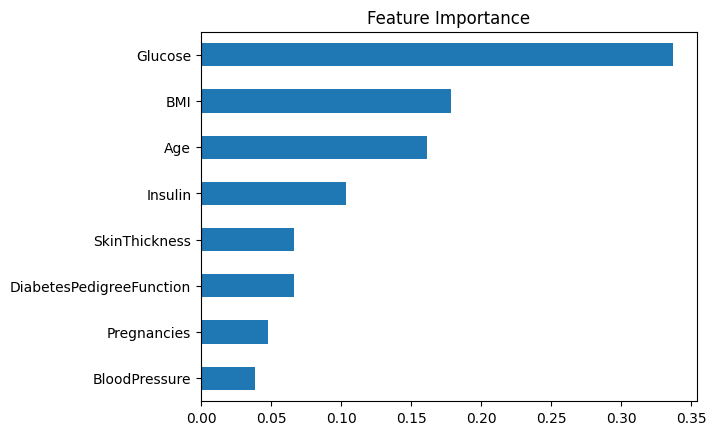

In [233]:
import matplotlib.pyplot as plt
feat_importances.sort_values().plot(kind="barh")
plt.title('Feature Importance')
plt.show();

In [235]:
from sklearn.metrics import auc,roc_curve

In [236]:
y_proba=model_tuned.predict_proba(x_test_mean)[:,1]
fpr,tpr,_=roc_curve(y_test_mean,y_proba)
roc_auc=auc(fpr,tpr)

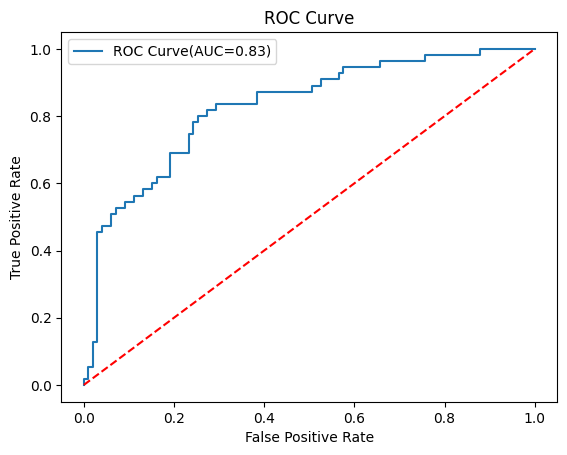

In [238]:
plt.plot(fpr,tpr,label=f"ROC Curve(AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],'--',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show();